<a href="https://colab.research.google.com/github/journey-Ji/Python-Data-Image/blob/main/%EB%84%A4%EC%9D%B4%EB%B2%84%EC%98%81%ED%99%94%EC%A0%95%EB%B3%B4%ED%81%AC%EB%A1%A4%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 크롤링

리뷰 정보 클래스 작성

In [38]:
import urllib.request
from bs4 import BeautifulSoup

class Review:
  def __init__(self,comment,date,star,good,bad):
    self.comment = comment
    self.date = date
    self.star = star
    self.good = good
    self.bad = bad

  def show(self):
    print("내용: " +self.comment +
          "\n날짜: " + self.date +
          "\n별: " + self.star +
          "\n좋아요: " + self.good +
          "\n싫어: " + self.bad 
          
          )

리뷰 정보 크롤링 함수

In [39]:
def crawl(url):
  soup = BeautifulSoup(urllib.request.urlopen(url).read(),"html.parser")

  review_list = [] #리뷰의 모든 정보를 담기위한 리스트 
  title = soup.find('h3',class_= 'h_movie').find('a').text
  div = soup.find('div',class_='score_result')
  data_list =div.select("ul > li")

  for review in data_list:
    star = review.find('div', class_="star_score").text.strip()
    reply = review.find('div', class_="score_reple")
    comment = reply.find("p").text.strip()
    date = reply.select('dt > em')[1].text.strip()
    button = review.find('div', class_='btn_area')
    sympathy = button.select("strong")
    good = sympathy[0].text
    bad = sympathy[1].text
    review_list.append(Review(comment,date, star, good, bad))

  return title, review_list


리뷰 정보 크롤링 실습 

In [34]:
title, review_list = crawl("https://movie.naver.com/movie/bi/mi/basic.nhn?code=36944")

print('제목: '+title)
for review in review_list:
  review.show()


제목: 올드보이
내용: 이 영화는 필요 이상으로 너무 잘만들었다. 인간이 만든 작품이 아니다.
날짜: 2013.06.09 17:59
별: 10
좋아요: 3478
싫어: 205
내용: 충격적인 영화 촬영 기법, 스토리, 눈물샘을 자극시키는 사운드트랙. 대중영화 예술에 큰 기여를 한 혁명적인 영화.
날짜: 2013.06.09 01:08
별: 10
좋아요: 2216
싫어: 88
내용: 사람은 상상력이 있어서 비겁해 지는거래...
날짜: 2013.07.17 14:26
별: 10
좋아요: 1985
싫어: 70
내용: 10년만에 다시 본 올드보이. 역시 최고였다.
날짜: 2013.07.28 01:53
별: 10
좋아요: 1518
싫어: 71
내용: 개인적으로는 레옹보다 명작이라고 생각한다. 한국에서 다시 나오기 힘든 작품
날짜: 2013.07.15 11:15
별: 10
좋아요: 1466
싫어: 127


# 데이터 시각화

데이터 프레임

In [43]:
import pandas as pd

def get_summary(review_list):
  star_list=[]
  good_list=[]
  bad_list=[]

  for review in review_list:
    star_list.append(int(review.star))
    good_list.append(int(review.good))
    bad_list.append(int(review.bad))

  star_series = pd.Series(star_list)
  good_series = pd.Series(good_list)
  bad_series = pd.Series(bad_list)

  summary = pd.DataFrame({
      'Star' : star_series,
      'Good' : good_series,
      'Bad' : bad_series,
      'Score' : good_series / (good_series + bad_series)

  })
  return summary

다수의 영화 데이터 시각화

In [46]:
movie_code_list = [136900,167657, 174321, 184859, 167391]
review_lists=[]

for i in movie_code_list:
  title, review_list = crawl("https://movie.naver.com/movie/bi/mi/basic.nhn?code="+str(i))
  summary =get_summary(review_list)
  print("[%s]"%(title))
  print(summary)
  review_lists.append((title,review_list))

[어벤져스: 엔드게임]
   Star   Good  Bad     Score
0    10  23712  663  0.972800
1    10  15704  442  0.972625
2    10  15308  473  0.970027
3    10  13676  560  0.960663
4    10  11861  436  0.964544
[명탐정 피카츄]
   Star  Good  Bad     Score
0    10  1961  105  0.949177
1    10   986   85  0.920635
2    10   907   78  0.920812
3     8   956  283  0.771590
4     8   632   43  0.936296
[고양이 여행 리포트]
   Star  Good  Bad     Score
0    10    75    5  0.937500
1    10    45    3  0.937500
2    10    35    4  0.897436
3    10    32    2  0.941176
4     6    53   25  0.679487
[물의 기억]
   Star  Good  Bad     Score
0    10    28   11  0.717949
1    10    26   11  0.702703
2    10    23   10  0.696970
3    10    18    6  0.750000
4    10    21    9  0.700000
[더 캡틴]
   Star  Good  Bad     Score
0     9    87   12  0.878788
1    10    46    5  0.901961
2    10    48    7  0.872727
3     8    41    6  0.872340
4     8    29    0  1.000000


다수의 영화 데이터 시각화 

Matplotlib를 이용한 시각화

In [47]:
!apt-get updatae -qq
!apt-get install fonts-nanum* -qq # 나눔고딕 폰트 설치 




E: Invalid operation updatae
Selecting previously unselected package fonts-nanum.
(Reading database ... 146425 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


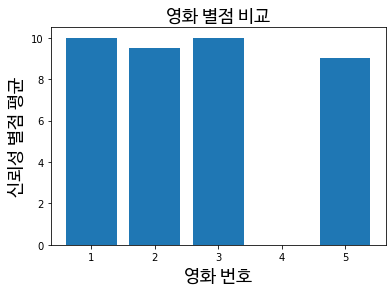

In [50]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

def movie_compare(review_lists):
  count=1
  x = []
  y = []
  for movie, review_list in review_lists:
    x.append(count)
    summary = get_summary(review_list)
    summary = summary[summary['Score'] > 0.8] #신뢰할 만한 정보만 걸러옴
    y.append(summary['Star'].mean())
    count +=1
  plt.bar(x,y)
  plt.title('영화 별점 비교', fontproperties = fontprop)
  plt.xlabel('영화 번호', fontproperties = fontprop)
  plt.ylabel('신뢰성 별점 평균', fontproperties = fontprop)
  plt.show()

movie_compare(review_lists)

#4번 영화인 물의 기억의 경우 신뢰성을 바탕으로 하는 Score의 점수가 0.8을 모두 넘기지 못하는 리뷰들만 가져왔기 때문에
#점수를 집계하지 못함